<a href="https://colab.research.google.com/github/slavyolov/Algorithms/blob/main/Copy_of_NN_class_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.utils import resample
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/creditcard.csv'

Mounted at /content/drive


# I. Зареждане на данните и предварителни наблюдения

In [ ]:
df = pd.read_csv(file_path)
print("Row count", len(df))
print("*"*100)
print(df.groupby("Class")["Class"].count())
print(df.info())
print("*"*100)
df.head()

Row count 284807
****************************************************************************************************
Class
0    284315
1       492
Name: Class, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  f

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print("Share missing", 492 / 284807)

Share missing 0.001727485630620034


Observations¶
- Данните, които сме избрали имат 2 класа (0 - нормална трансакция и 1 - измама). 
- От 284,807 наблюдения само 492 са от клас 1 (0.172% от редовете са измама)
- Променливи (V1 - V28) - генерирани с PCA с цел анонимизиране на данните
- Липсват метаданни за оригиналните променливи, следователно предварителен анализ на променливите не може да бъде осъществен

- Предварителния анализ представлява : подготовка на данните преди анализа. Включва почистване, орханизиране и трансформиране на информацията. 

- Няма липсващи данни.
- **Проблем при небалансираните данни :**
    
    - Bias towards the majority class (Моделът ще има отклонение към доминиращия клас. Моделът ще се научи да го предсказва по-често)
    - poor generalization: Imbalanced data can negatively impact the model's ability to generalize well to unseen data. (негативно въздействие върху способността на модела да обобщава добре към непознати данни.)
    - Evaluation metrics may be misleading: Traditional evaluation metrics like accuracy can be misleading in the presence of imbalanced data. A high accuracy can be achieved by simply predicting the majority class for all instances, while ignoring the minority class. Therefore, using alternative metrics like precision, recall, F1-score, or area under the precision-recall curve is recommended.
    - Lack of representative patterns: Imbalanced data can result in insufficient examples of the minority class for the model to learn meaningful patterns or features associated with it. As a result, the model may struggle to distinguish the minority class from the majority class accurately.

- **Стратегии при трениране в случай на небалансирани данни**
 - To mitigate these problems, techniques such as resampling (oversampling or undersampling), using different evaluation metrics, applying class weights, or employing advanced algorithms specifically designed for imbalanced data can be employed

# II. Data preparation

- undrsampling
- oversampling (SMOTE)

Информация за SMOTE : https://towardsdatascience.com/smote-fdce2f605729

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_nn = df.copy(deep=True) 

# Нормализиране (скалиране) на колона 'Amount'
df_nn['normalized_amount']=StandardScaler().fit_transform(df_nn['Amount'].values.reshape(-1,1))

# Премахване на колоната 'Amount'
df_nn=df_nn.drop(['Amount'],axis=1)
df_nn.head()

# Премахване на колоната 'Time'
df_nn=df_nn.drop(['Time'],axis=1)

# Split data
X = df_nn.drop('Class', axis=1)
y = df_nn['Class']

# Разделяне на данните на такива за трениране (in sample) и тест (out of sample)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("'y_train', before oversampling, counts of label '1': {}".format(sum(y_train==1)))
print("'y_train', before oversampling, counts of label '0': {} \n".format(sum(y_train==0)))

# SMOTE resampling (technique 1)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print("'y_train', after oversampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("'y_train', after oversampling, counts of label '0': {}".format(sum(y_train_res==0)))

# Perform undersampling on the training set (technique 2)
df_train = pd.concat([X_train, y_train], axis=1)
df_majority = df_train[df_train['Class'] == 0]
df_minority = df_train[df_train['Class'] == 1]

print("df_majority.shape", df_majority.shape)
print("df_minority.shape", df_minority.shape)

df_majority_undersampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)
print("df_majority_undersampled.shape", df_majority_undersampled.shape)

df_undersampled = pd.concat([df_majority_undersampled, df_minority])
X_train_undersampled = df_undersampled.drop('Class', axis=1)
y_train_undersampled = df_undersampled['Class']

'y_train', before oversampling, counts of label '1': 356
'y_train', before oversampling, counts of label '0': 199008 

'y_train', after oversampling, counts of label '1': 199008
'y_train', after oversampling, counts of label '0': 199008
df_majority.shape (199008, 30)
df_minority.shape (356, 30)
df_majority_undersampled.shape (356, 30)


## Custom loss function

In [ ]:
# custom loss
def focal_loss_lgb(y_pred, dtrain, alpha, gamma):
    """
    Focal Loss for lightgbm

    Parameters:
    -----------
    y_pred: numpy.ndarray
        array with the predictions
    dtrain: lightgbm.Dataset
    alpha, gamma: float
        See original paper https://arxiv.org/pdf/1708.02002.pdf
    """
    a,g = alpha, gamma
    y_true = dtrain.label
    def fl(x,t):
        p = 1/(1+np.exp(-x))
        return -( a*t + (1-a)*(1-t) ) * (( 1 - ( t*p + (1-t)*(1-p)) )**g) * ( t*np.log(p)+(1-t)*np.log(1-p) )
    partial_fl = lambda x: fl(x, y_true)
    grad = derivative(partial_fl, y_pred, n=1, dx=1e-6)
    hess = derivative(partial_fl, y_pred, n=2, dx=1e-6)
    return grad, hess

# custom evaluation function
def focal_loss_lgb_eval_error(y_pred, dtrain, alpha, gamma):
    """
    Adapation of the Focal Loss for lightgbm to be used as evaluation loss

    Parameters:
    -----------
    y_pred: numpy.ndarray
        array with the predictions
    dtrain: lightgbm.Dataset
    alpha, gamma: float
        See original paper https://arxiv.org/pdf/1708.02002.pdf
    """
    a,g = alpha, gamma
    y_true = dtrain.label
    p = 1/(1+np.exp(-y_pred))
    loss = -( a*y_true + (1-a)*(1-y_true) ) * (( 1 - ( y_true*p + (1-y_true)*(1-p)) )**g) * ( y_true*np.log(p)+(1-y_true)*np.log(1-p) )
    return 'focal_loss', np.mean(loss), False

focal_loss = lambda x,y: focal_loss_lgb(x, y, 0.25, 2.)
focal_eval_error = lambda x,y: focal_loss_lgb_eval_error(x, y, 0.25, 2.)

# III. Train MLP using grid search

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

def calculate_fdr(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    fdr = fp / (fp + tp)
    return fdr

def calculate_recall(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    recall = tp / (tp + fn)
    return recall

def train_and_predict_MLP(X_train, y_train, X_test, y_test):
    # Define your neural network model
    model = MLPClassifier()

    # Define the hyperparameters to tune and their respective values to explore
    param_grid = {
        'hidden_layer_sizes': [(64,), (32,), (32, 16,), (32, 16, 8)],
        'activation': ['relu'],
        'learning_rate': ['constant', 'adaptive'],
        'alpha': [0.001, 0.01],
        'batch_size': [32]
    }

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', 
                               verbose=2)
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and corresponding model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Train the best model on the entire training set
    best_model.fit(X_train, y_train)

    y_pred=best_model.predict(X_test).round()
    y_test=pd.DataFrame(y_test)

    # Evaluate the best model on the test set
    accuracy = best_model.score(X_test, y_test)
    print("Best Model Accuracy:", accuracy)
    print("Best Hyperparameters:", best_params)

    fdr = calculate_fdr(y_test, y_pred)
    recall = calculate_recall(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Create DataFrame
    data = {
        'Model': [grid_search.best_estimator_],
        'Model params': [grid_search.best_params_],
        'FDR': [fdr],
        'Recall': [recall],
        'F1-score': [f1],
        'Precision': [precision]
    }

    compare_df = pd.DataFrame(data)
    return compare_df
    

In [ ]:
# Run 1 : Undersampling
compare_df_1 = train_and_predict_MLP(X_train=X_train_undersampled, 
                                     y_train=y_train_undersampled, 
                                     X_test=X_test, y_test=y_test)

print(compare_df_1)

85443
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END activation=relu, alpha=0.001, batch_size=32, hidden_layer_sizes=(64,), learning_rate=constant; total time=   1.4s
[CV] END activation=relu, alpha=0.001, batch_size=32, hidden_layer_sizes=(64,), learning_rate=constant; total time=   1.5s
[CV] END activation=relu, alpha=0.001, batch_size=32, hidden_layer_sizes=(64,), learning_rate=constant; total time=   1.7s
[CV] END activation=relu, alpha=0.001, batch_size=32, hidden_layer_sizes=(64,), learning_rate=adaptive; total time=   1.4s
[CV] END activation=relu, alpha=0.001, batch_size=32, hidden_layer_sizes=(64,), learning_rate=adaptive; total time=   1.6s
[CV] END activation=relu, alpha=0.001, batch_size=32, hidden_layer_sizes=(64,), learning_rate=adaptive; total time=   0.9s
[CV] END activation=relu, alpha=0.001, batch_size=32, hidden_layer_sizes=(32,), learning_rate=constant; total time=   1.1s
[CV] END activation=relu, alpha=0.001, batch_size=32, hidden_layer_sizes

In [ ]:
# Run 2 : Oversampling (SMOTE)
compare_df_2 = train_and_predict_MLP(X_train=X_train_res, 
                                     y_train=y_train_res, 
                                     X_test=X_test, y_test=y_test)

print(compare_df_2)

85443
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END activation=relu, alpha=0.001, batch_size=32, hidden_layer_sizes=(64,), learning_rate=constant; total time= 3.8min
[CV] END activation=relu, alpha=0.001, batch_size=32, hidden_layer_sizes=(64,), learning_rate=constant; total time= 2.9min
[CV] END activation=relu, alpha=0.001, batch_size=32, hidden_layer_sizes=(64,), learning_rate=constant; total time= 2.5min
[CV] END activation=relu, alpha=0.001, batch_size=32, hidden_layer_sizes=(64,), learning_rate=adaptive; total time= 2.9min
[CV] END activation=relu, alpha=0.001, batch_size=32, hidden_layer_sizes=(64,), learning_rate=adaptive; total time= 3.1min
[CV] END activation=relu, alpha=0.001, batch_size=32, hidden_layer_sizes=(64,), learning_rate=adaptive; total time= 2.2min
[CV] END activation=relu, alpha=0.001, batch_size=32, hidden_layer_sizes=(32,), learning_rate=constant; total time= 2.2min
[CV] END activation=relu, alpha=0.001, batch_size=32, hidden_layer_sizes

In [ ]:
# Best Hyperparameters: {'activation': 'relu', 'alpha': 0.001, 'batch_size': 32, 'hidden_layer_sizes': (64,), 'learning_rate': 'constant'}
compare_df_2

,Model,Model params,FDR,Recall,F1-score,Precision
0,"MLPClassifier(alpha=0.001, batch_size=32, hidd...","{'activation': 'relu', 'alpha': 0.001, 'batch_...",0.495868,0.897059,0.645503,0.504132


# IV. Sequential NN

In [ ]:
# Undersampling does not perform well
# X_train_tmp = X_train_undersampled
# y_train_tmp = y_train_undersampled
X_train_tmp = X_train_res
y_train_tmp = y_train_res


import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier


# Define the function to create the Keras model
def create_model(units, activation='relu', input_dim=29, dropout=0.0):
    model = Sequential()
    model.add(Dense(units=units, activation=activation, input_dim=input_dim))
    model.add(Dense(units=units,activation=activation))
    if dropout > 0.0:
        model.add(Dropout(dropout))
    units_tmp = units*0.5
    model.add(Dense(units=units_tmp,activation=activation))
    units_tmp = units_tmp*0.5
    model.add(Dense(units=units_tmp,activation=activation))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

def train_model(X, y):
    # Create an instance of KerasClassifier with the create_model function
    model = KerasClassifier(build_fn=create_model)

    # Define the hyperparameters to tune and their respective values to explore
    param_grid = {
        'units': [128, 64, 32, 16],
        'dropout': [0.0, 0.5]
    }

    # Perform grid search with cross-validation (Undersampling)
    grid_search = GridSearchCV(model, param_grid, cv=3)
    grid_search.fit(X=X, y=y)

    # Get the best hyperparameters and corresponding model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Train the best model on the entire dataset
    best_model.fit(x=X, y=y, epochs=10, batch_size=15)
    return best_model, best_params

In [ ]:
best_model, best_params, grid_search = train_model(X=X_train_res, y=y_train_res)
print(best_model)
print(best_params)

best_model.model.summary()
print("-"*100)

y_pred=best_model.predict(X_test).round()
y_test=pd.DataFrame(y_test)

fdr = calculate_fdr(y_test, y_pred)
recall = calculate_recall(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Create DataFrame
data = {
    'Model': [grid_search.best_estimator_],
    'parameters': [grid_search.best_params_],
    'FDR': [fdr],
    'Recall': [recall],
    'F1-score': [f1],
    'Precision': [precision]
}

tmp_df = pd.DataFrame(data)

 995/8292 [==>...........................] - ETA: 25s - loss: 0.0544 - accuracy: 0.9800

KeyboardInterrupt: ignored

In [ ]:
best_model.model.summary()

Model: "sequential_110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_550 (Dense)           (None, 64)                1920      
                                                                 
 dense_551 (Dense)           (None, 64)                4160      
                                                                 
 dense_552 (Dense)           (None, 32)                2080      
                                                                 
 dense_553 (Dense)           (None, 16)                528       
                                                                 
 dense_554 (Dense)           (None, 1)                 17        
                                                                 
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred=best_model.predict(X_test).round()
y_test=pd.DataFrame(y_test)

fdr = calculate_fdr(y_test, y_pred)
recall = calculate_recall(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Create DataFrame
data = {
    'Model': [grid_search.best_estimator_],
    'parameters': [grid_search.best_params_],
    'FDR': [fdr],
    'Recall': [recall],
    'F1-score': [f1],
    'Precision': [precision]
}

tmp_df = pd.DataFrame(data)

2671/2671 [==============================] - 5s 2ms/step


In [ ]:
tmp_df

,Model,parameters,FDR,Recall,F1-score,Precision
0,<keras.wrappers.scikit_learn.KerasClassifier o...,"{'dropout': 0.0, 'units': 64}",0.333333,0.852941,0.748387,0.666667


## Train sequential NN with custom loss

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import BinaryFocalCrossentropy
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define your Keras sequential model
def create_model():
    model = Sequential()
    model.add(Dense(units=16, activation='relu', input_dim=29))
    model.add(Dense(units=8, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss=BinaryFocalCrossentropy())
    return model

# Create a KerasClassifier with BinaryFocalCrossentropy loss
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32)

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
results = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation results
print('Cross-Validation Accuracy:', np.mean(results))


Epoch 1/10
7121/7121 [==============================] - 18s 2ms/step - loss: 0.0031
Epoch 2/10
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0011
Epoch 3/10
7121/7121 [==============================] - 17s 2ms/step - loss: 9.2707e-04
Epoch 4/10
7121/7121 [==============================] - 17s 2ms/step - loss: 8.2939e-04
Epoch 5/10
7121/7121 [==============================] - 17s 2ms/step - loss: 8.0522e-04
Epoch 6/10
7121/7121 [==============================] - 16s 2ms/step - loss: 7.6704e-04
Epoch 7/10
7121/7121 [==============================] - 16s 2ms/step - loss: 7.1451e-04
Epoch 8/10
7121/7121 [==============================] - 18s 2ms/step - loss: 6.8732e-04
Epoch 9/10
7121/7121 [==============================] - 18s 3ms/step - loss: 6.4420e-04
Epoch 10/10
1781/1781 [==============================] - 4s 2ms/step
Epoch 1/10
7121/7121 [==============================] - 18s 2ms/step - loss: 0.0033
Epoch 2/10
7121/7121 [==============================] - 17s 2ms

In [ ]:
y_pred=model.predict(X_test).round()
y_test=pd.DataFrame(y_test)

# Evaluate the best model on the test set
fdr = calculate_fdr(y_test, y_pred)
recall = calculate_recall(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Create DataFrame
data = {
    'Model': [model.__class__],
    'parameters': [None],
    'FDR': [fdr],
    'Recall': [recall],
    'F1-score': [f1],
    'Precision': [precision]
}

# tmp_df = pd.DataFrame(data)
pd.DataFrame(data)

AttributeError: ignored

# Keep best networks

In [ ]:
def train_and_store_best(model_name, params, X_train, y_train, X_test, y_test):
    # Define your neural network model
    best_model = MLPClassifier(**params)
    
    # Train the best model on the entire training set
    best_model.fit(X_train, y_train)

    y_pred=best_model.predict(X_test).round()
    y_test=pd.DataFrame(y_test)

    # Evaluate the best model on the test set
    fdr = calculate_fdr(y_test, y_pred)
    recall = calculate_recall(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Create DataFrame
    data = {
        'Model': [model_name],
        'parameters': [params],
        'FDR': [fdr],
        'Recall': [recall],
        'F1-score': [f1],
        'Precision': [precision]
    }

    tmp_df = pd.DataFrame(data)
    return tmp_df


In [ ]:
import tabulate

# Create DataFrame
data = {
    'Model': [],
    "parameters": [],
    'FDR': [],
    'Recall': [],
    'F1-score': [],
    'Precision': []
}

compare_df = pd.DataFrame(data)
compare_df = compare_df.append(tmp_df)

# Run 1 best
params = {'activation': 'relu', 
          'alpha': 0.001, 
          'batch_size': 32, 
          'hidden_layer_sizes': (32, 16), 
          'learning_rate': 'adaptive'}

tmp_df_2 = train_and_store_best(model_name="MLP_undersampling", params=params,
                     X_train=X_train_undersampled, 
                     y_train=y_train_undersampled, 
                     X_test=X_test, 
                     y_test=y_test)

compare_df = compare_df.append(tmp_df_2)

# Run 2 best

params = {'activation': 'relu', 
 'alpha': 0.001, 
 'batch_size': 32, 
 'hidden_layer_sizes': (64,), 
 'learning_rate': 'constant'}

tmp_df_3 = train_and_store_best(model_name="MLP_oversampling_SMOTE", params=params,
                     X_train=X_train_res, 
                     y_train=y_train_res, 
                     X_test=X_test, 
                     y_test=y_test)

compare_df = compare_df.append(tmp_df_3)

print(compare_df.to_markdown())

|    | Model                                                                  | parameters                                                                                                            |      FDR |   Recall |   F1-score |   Precision |
|---:|:-----------------------------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------|---------:|---------:|-----------:|------------:|
|  0 | <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2aae70c070> | {'dropout': 0.0, 'units': 64}                                                                                         | 0.333333 | 0.852941 |  0.748387  |   0.666667  |
|  0 | MLP_undersampling                                                      | {'activation': 'relu', 'alpha': 0.001, 'batch_size': 32, 'hidden_layer_sizes': (32, 16), 'learning_rate': 'adaptive'} | 0.971665 | 0.955882 |  0.0550381 |   0.0283348 |
|  0

In [ ]:
# Sequential NN
compare_df = compare_df.append(tmp_df)

print(compare_df.to_markdown())

|    | Model                                                                  | parameters                                                                                                            |      FDR |   Recall |   F1-score |   Precision |
|---:|:-----------------------------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------|---------:|---------:|-----------:|------------:|
|  0 | <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2aae70c070> | {'dropout': 0.0, 'units': 64}                                                                                         | 0.333333 | 0.852941 |  0.748387  |   0.666667  |
|  0 | MLP_undersampling                                                      | {'activation': 'relu', 'alpha': 0.001, 'batch_size': 32, 'hidden_layer_sizes': (32, 16), 'learning_rate': 'adaptive'} | 0.971665 | 0.955882 |  0.0550381 |   0.0283348 |
|  0

# V. Taking best results from more complex networks

## Focal loss

In [ ]:
!pip install focal_loss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### train model

In [ ]:
 # Last network :

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)


# SMOTE resampling (technique 1)
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

# scalar = StandardScaler()
# X_train = scalar.fit_transform(X_train)
# X_validate = scalar.transform(X_validate)
# X_test = scalar.transform(X_test)

print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}\n{'_'*50}")

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu',
                       input_dim=len(X_train.columns)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])


print("\n\n" + "="*100)
print("Networks structure")
print("="*100)

model.summary()

METRICS = [
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
]

from focal_loss import BinaryFocalLoss
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
              loss=BinaryFocalLoss(gamma=2), metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=200, 
    callbacks=callbacks,
)

score = model.evaluate(X_test, y_test)
print(score)

TRAINING: X_train: (318408, 29), y_train: (318408,)
_______________________________________________________
VALIDATION: X_validate: (39873, 29), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 29), y_test: (85443,)
__________________________________________________


Networks structure
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               3840      
                                                                 
 batch_normalization_9 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 128)        

### plot model training

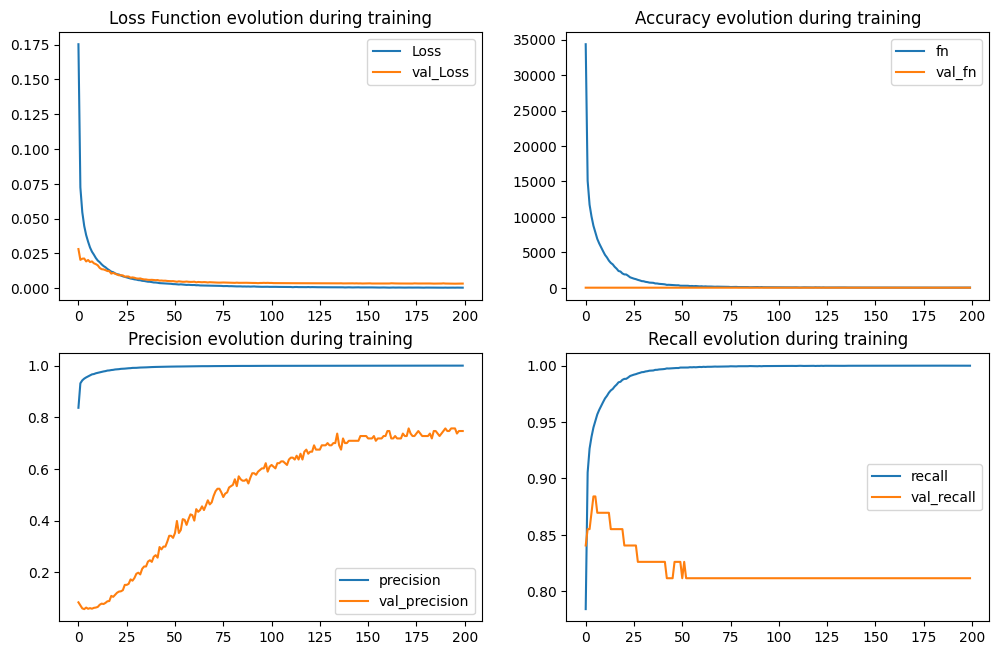

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

### Scoring out of sample

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

2671/2671 [==============================] - 3s 1ms/step
Train Result:
Accuracy Score: 99.99%
_______________________________________________
Classification Report:
                       0              1  accuracy      macro avg  \
precision       1.000000       0.999868  0.999934       0.999934   
recall          0.999868       1.000000  0.999934       0.999934   
f1-score        0.999934       0.999934  0.999934       0.999934   
support    159204.000000  159204.000000  0.999934  318408.000000   

            weighted avg  
precision       0.999934  
recall          0.999934  
f1-score        0.999934  
support    318408.000000  
_______________________________________________
Confusion Matrix: 
 [[159183     21]
 [     0 159204]]

Test Result:
Accuracy Score: 99.94%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999754    0.804196  0.999427      0.901975      0.999443


##  Focal loss + SMOTE (350 epochs)

### train model

In [ ]:
 # Last network :

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)


# SMOTE resampling (technique 1)
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

# scalar = StandardScaler()
# X_train = scalar.fit_transform(X_train)
# X_validate = scalar.transform(X_validate)
# X_test = scalar.transform(X_test)

print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}\n{'_'*50}")

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu',
                       input_dim=len(X_train.columns)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])


print("\n\n" + "="*100)
print("Networks structure")
print("="*100)

model.summary()

METRICS = [
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
]

from focal_loss import BinaryFocalLoss
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
              loss=BinaryFocalLoss(gamma=2), metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=350, 
    callbacks=callbacks,
)

score = model.evaluate(X_test, y_test)
print(score)

TRAINING: X_train: (318408, 29), y_train: (318408,)
_______________________________________________________
VALIDATION: X_validate: (39873, 29), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 29), y_test: (85443,)
__________________________________________________


Networks structure
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               3840      
                                                                 
 batch_normalization_15 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 128)        

### plot model training

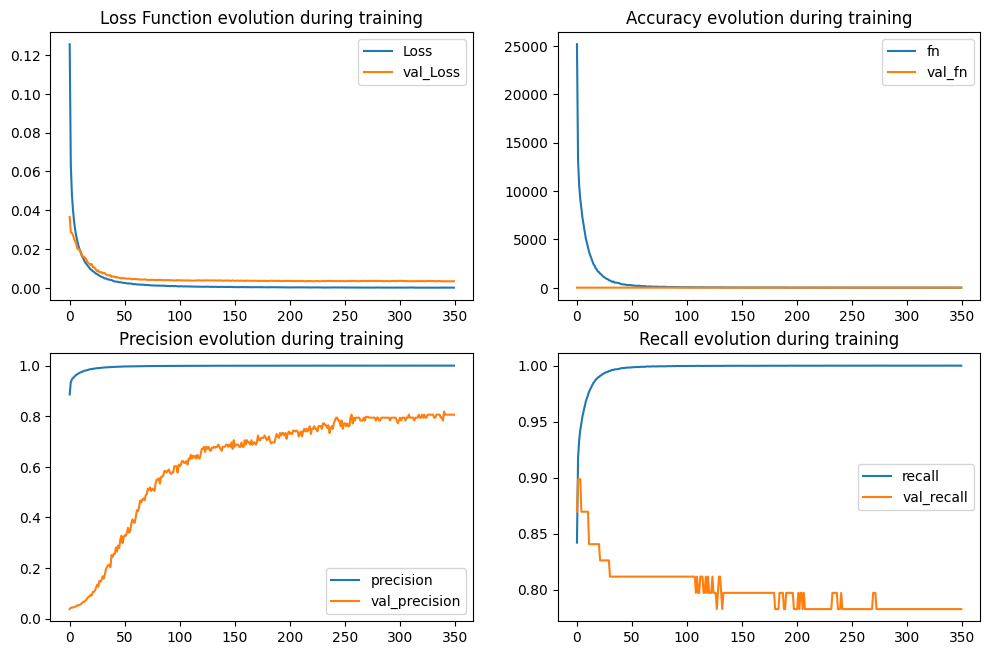

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

### Scoring out of sample

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

2671/2671 [==============================] - 3s 1ms/step
Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                       0              1  accuracy      macro avg  \
precision       1.000000       0.999987  0.999994       0.999994   
recall          0.999987       1.000000  0.999994       0.999994   
f1-score        0.999994       0.999994  0.999994       0.999994   
support    159204.000000  159204.000000  0.999994  318408.000000   

            weighted avg  
precision       0.999994  
recall          0.999994  
f1-score        0.999994  
support    318408.000000  
_______________________________________________
Confusion Matrix: 
 [[159202      2]
 [     0 159204]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999730    0.849624  0.999497      0.924677      0.999491

## Smote + binary cross entropy

### train model

In [ ]:
 # Last network :

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)


# SMOTE resampling (technique 1)
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

# scalar = StandardScaler()
# X_train = scalar.fit_transform(X_train)
# X_validate = scalar.transform(X_validate)
# X_test = scalar.transform(X_test)

print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}\n{'_'*50}")

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu',
                       input_dim=len(X_train.columns)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])


print("\n\n" + "="*100)
print("Networks structure")
print("="*100)

model.summary()

METRICS = [
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
]

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=200, 
    callbacks=callbacks,
)

score = model.evaluate(X_test, y_test)
print(score)

TRAINING: X_train: (318408, 29), y_train: (318408,)
_______________________________________________________
VALIDATION: X_validate: (39873, 29), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 29), y_test: (85443,)
__________________________________________________


Networks structure
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               3840      
                                                                 
 batch_normalization_12 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 128)        

### plot model training

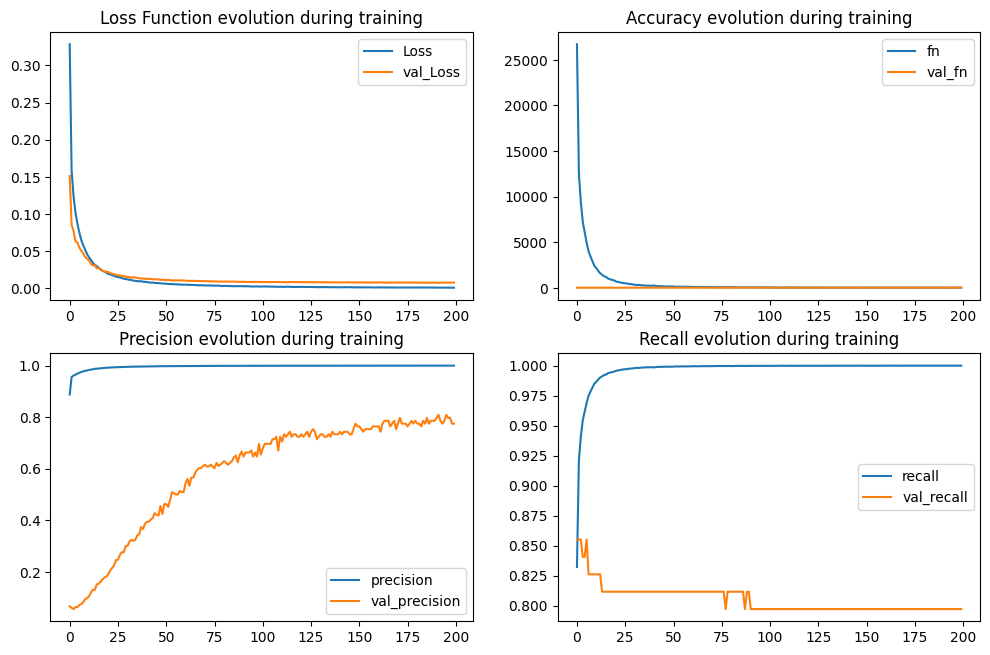

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

### Scoring out of sample

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

2671/2671 [==============================] - 3s 1ms/step
Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                       0              1  accuracy      macro avg  \
precision       1.000000       0.999912  0.999956       0.999956   
recall          0.999912       1.000000  0.999956       0.999956   
f1-score        0.999956       0.999956  0.999956       0.999956   
support    159204.000000  159204.000000  0.999956  318408.000000   

            weighted avg  
precision       0.999956  
recall          0.999956  
f1-score        0.999956  
support    318408.000000  
_______________________________________________
Confusion Matrix: 
 [[159190     14]
 [     0 159204]]

Test Result:
Accuracy Score: 99.94%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999730    0.807143  0.999415      0.903437      0.999424

## Binary cross entropy no preprocessing

### train model

In [ ]:
 # Last network :

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

# scalar = StandardScaler()
# X_train = scalar.fit_transform(X_train)
# X_validate = scalar.transform(X_validate)
# X_test = scalar.transform(X_test)

print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}\n{'_'*50}")

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu',
                       input_dim=len(X_train.columns)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])


print("\n\n" + "="*100)
print("Networks structure")
print("="*100)

model.summary()


METRICS = [
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
]

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=300, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

score = model.evaluate(X_test, y_test)
print(score)

TRAINING: X_train: (159491, 29), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 29), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 29), y_test: (85443,)
__________________________________________________
Fraudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


Networks structure
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 256)               7680      
                                                                 
 batch_normalization_21 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
       

### plot model

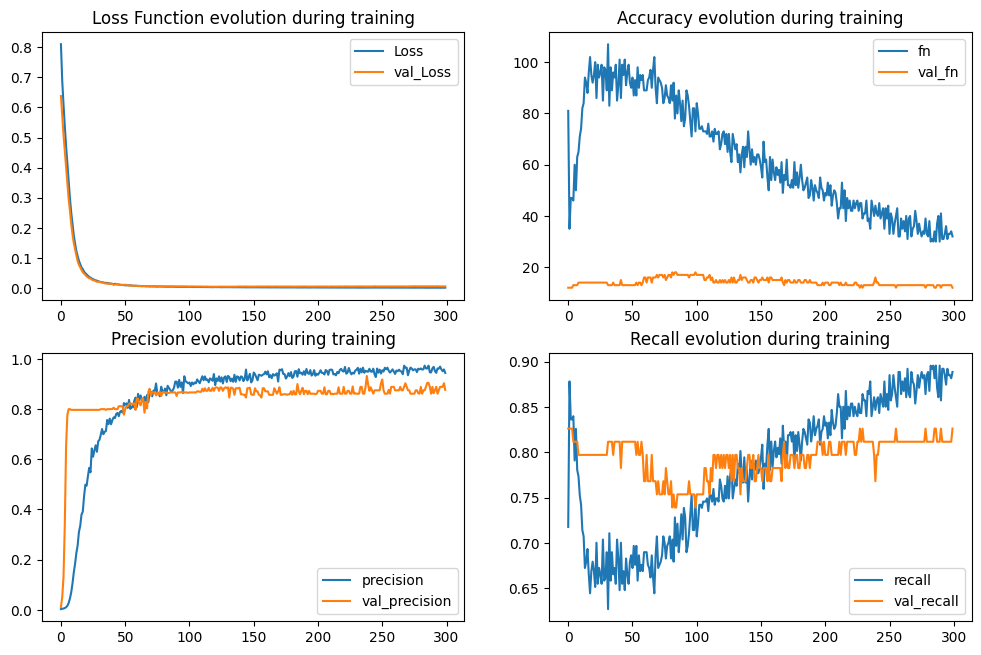

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

### Scoring out of sample

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

2671/2671 [==============================] - 6s 2ms/step
Train Result:
Accuracy Score: 99.99%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999893    0.996310  0.999887       0.998102       0.999887
recall          0.999994    0.940767  0.999887       0.970380       0.999887
f1-score        0.999943    0.967742  0.999887       0.983843       0.999886
support    159204.000000  287.000000  0.999887  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[159203      1]
 [    17    270]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999695    0.901639  0.999555      0.950667      0.999539
recall         0.999859    0.808824  0.999555      0.904341      0.999555
f1-score       0.

# Обяснение на мрежата - binary cross entropy no preprocessing: 

Последователна невронна мрежа (Sequential neural network)

The provided network is a sequential model implemented using the Keras library. Here's an explanation of each layer:

Dense layer with 256 units and ReLU activation: This is the input layer of the network. It has 256 units and uses the ReLU (Rectified Linear Unit) activation function. The input dimension is determined by the number of columns in the training data (len(X_train.columns)).

BatchNormalization layer: This layer normalizes the inputs of the previous layer by adjusting and scaling the activations. It helps in reducing the internal covariate shift problem and improving the training process.

Dropout layer with a dropout rate of 0.3: Dropout is a regularization technique that randomly sets a fraction of input units to 0 during training. It helps in preventing overfitting by reducing the reliance of the network on specific units and encourages the network to learn more robust representations.

Dense layer with 256 units and ReLU activation: This is a hidden layer in the network. It has 256 units and uses the ReLU activation function.

BatchNormalization layer: Similar to the previous BatchNormalization layer, this layer normalizes the inputs of the previous layer.

Dropout layer with a dropout rate of 0.3: Another Dropout layer is added to further regularize the network and prevent overfitting.

Dense layer with 256 units and ReLU activation: This is another hidden layer in the network, similar to the previous hidden layer.

BatchNormalization layer: This layer normalizes the inputs of the previous layer.

Dropout layer with a dropout rate of 0.3: Another Dropout layer is added for further regularization.

Dense layer with 1 unit and sigmoid activation: This is the output layer of the network. It has 1 unit and uses the sigmoid activation function, which is commonly used for binary classification tasks. It produces a probability output between 0 and 1, indicating the likelihood of the input belonging to the positive class.

In summary, the network consists of several dense layers with ReLU activation, interspersed with BatchNormalization and Dropout layers for regularization. The final output layer uses the sigmoid activation function for binary classification. This architecture aims to capture complex patterns in the data while reducing overfitting through regularization techniques.


## Additional information
This line of code represents a layer in a neural network architecture, specifically a dense layer. Here's a breakdown of its components:

Dense: It indicates that the layer is a fully connected or dense layer, where each neuron or unit is connected to every neuron in the previous layer and the subsequent layer.

units=16: It specifies the number of neurons or units in the dense layer. In this case, there are 16 units in the layer.

input_dim=29: It denotes the dimension or size of the input to this layer. In this case, the input has 29 dimensions or features.

activation='relu': It specifies the activation function used in the layer. Activation functions introduce non-linearity to the neural network, allowing it to learn complex patterns and relationships in the data. 'relu' stands for Rectified Linear Unit and is a commonly used activation function that returns the input if it is positive and zero otherwise.

Dropout(0.3): This line represents a dropout layer with a dropout rate of 0.3. Dropout is a regularization technique used to prevent overfitting in neural networks. During training, dropout randomly sets a fraction of input units (in this case, 30%) to zero at each update, which helps in reducing the reliance of the network on specific neurons and promotes better generalization.



### Additional information : 
- https://towardsdatascience.com/everything-you-need-to-know-about-neural-networks-and-backpropagation-machine-learning-made-easy-e5285bc2be3a
- https://www.kaggle.com/code/faressayah/credit-card-fraud-detection-anns-vs-xgboost/notebook#4.-1.-Artificial-Neural-Network-(ANNs)

In [ ]:
# Трениране на Невронна мрежа

from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense

model = Sequential([
     #First Layer
     Dense(units=16, input_dim=29, activation='relu'),
      #Second Layer
     Dense(units=24,activation='relu'),
     Dropout(0.5),
      #Third Layer
     Dense(20,activation='relu'),
     #Fourth Layer
     Dense(24,activation='relu'),
     #Fifth Layer
     Dense(1,activation='sigmoid')   
])


model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                480       
                                                                 
 dense_37 (Dense)            (None, 24)                408       
                                                                 
 dropout_6 (Dropout)         (None, 24)                0         
                                                                 
 dense_38 (Dense)            (None, 20)                500       
                                                                 
 dense_39 (Dense)            (None, 24)                504       
                                                                 
 dense_40 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-traina

Setting Optimizer and Loss Function:

To configure the optimizer and loss function for our model, several important steps need to be taken to ensure effective training.

Firstly, the loss function is defined to measure the model's performance on labeled images, quantifying the error rate between the predicted and observed labels. For categorical classification tasks with two classes, a specific form of loss function called "binary_crossentropy" is used.

Equally crucial is the choice of optimizer, responsible for iteratively adjusting parameters such as filter kernel values, weights, and neuron biases to minimize the loss. I have opted for the Adam optimizer, which combines the advantages of two other extensions of stochastic gradient descent.

The first advantage is the Adaptive Gradient Algorithm (AdaGrad), which maintains per-parameter learning rates and performs well on problems with sparse gradients, such as natural language and computer vision tasks. The second advantage is the Root Mean Square Propagation (RMSProp), which adapts per-parameter learning rates based on recent gradient magnitudes, making it suitable for online and non-stationary problems.

By integrating the benefits of AdaGrad and RMSProp, Adam has become a popular choice in deep learning as it achieves fast and effective results.

Additionally, the metric function "accuracy" is utilized to evaluate the model's performance. This metric function shares similarities with the loss function but is used purely for evaluation purposes and does not impact the model's training process.

Lastly, I have implemented 10 epochs and a batch size of 15, determining the number of times the model iterates over the entire dataset and the number of samples processed before the model's parameters are updated, respectively.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train_res, y_train_res, batch_size=15, epochs=10)

score=model.evaluate(X_test,y_test)
print(score)

Epoch 1/10
26535/26535 [==============================] - 61s 2ms/step - loss: 0.0396 - accuracy: 0.9862
Epoch 2/10
26535/26535 [==============================] - 54s 2ms/step - loss: 0.0144 - accuracy: 0.9964
Epoch 3/10
26535/26535 [==============================] - 51s 2ms/step - loss: 0.0115 - accuracy: 0.9972
Epoch 4/10
26535/26535 [==============================] - 52s 2ms/step - loss: 0.0103 - accuracy: 0.9975
Epoch 5/10
26535/26535 [==============================] - 50s 2ms/step - loss: 0.0090 - accuracy: 0.9980
Epoch 6/10
26535/26535 [==============================] - 48s 2ms/step - loss: 0.0087 - accuracy: 0.9980
Epoch 7/10
26535/26535 [==============================] - 51s 2ms/step - loss: 0.0077 - accuracy: 0.9982
Epoch 8/10
26535/26535 [==============================] - 50s 2ms/step - loss: 0.0076 - accuracy: 0.9983
Epoch 9/10
26535/26535 [==============================] - 50s 2ms/step - loss: 0.0079 - accuracy: 0.9984
Epoch 10/10
2671/2671 [==============================] 

In [ ]:
y_pred=model.predict(X_test).round()
y_test=pd.DataFrame(y_test)

2671/2671 [==============================] - 3s 1ms/step


Confusion matrix, without normalization
[[85145   162]
 [   14   122]]


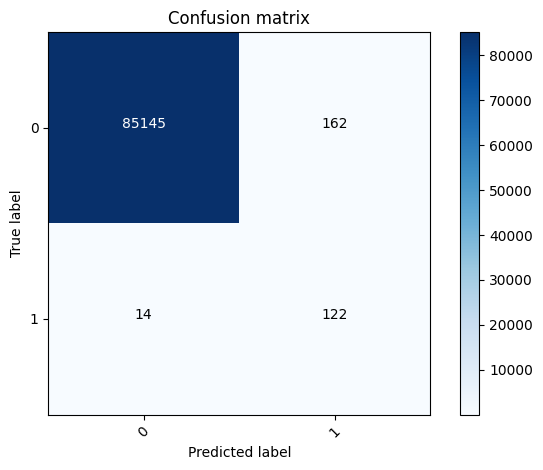

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools


# Function to plot Confusion Matrix (to be used later).
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

# Scoring 

The F1-score is a single metric that balances both precision and recall, and it is commonly used to evaluate the performance of classification models. The F1-score ranges from 0 to 1, with a higher value indicating better performance.

The F1-score considers the harmonic mean of precision and recall, giving equal importance to both metrics. It is especially useful in scenarios where you want to find a balance between correctly identifying positive instances (high recall) and minimizing false positives (high precision).

In summary, a higher F1-score indicates better model performance, as it reflects a better trade-off between precision and recall. Therefore, when evaluating different models or comparing results, a higher F1-score is generally desired.